## Punto 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def f(x,y):
    return x + 2*y

In [3]:
def Solucion(x):
    return -0.5*x - (1-np.exp(2*x))/4.

In [4]:
N = 20 #Insertar aqui el numero de puntos

In [5]:
t = np.linspace(0,1,N)
h = t[1] - t[0]

In [6]:
yext = Solucion(t)

In [7]:
def GetEuler1(x,y,h):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        y[i] = y[i-1] + h*k1

In [8]:
def GetEuler2(x,y,h):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+h,y[i-1] + h*k1)
        
        y[i] = y[i-1] + 0.5*h*(k1+k2)

In [9]:
def GetEuler3(x,y,h):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+0.5*h,y[i-1] + 0.5*h*k1)
        k3 = f(x[i-1]+h,y[i-1]-h*k1+2*h*k2)
        
        y[i] = y[i-1] + (1/6)*h*(k1+4*k2+k3)

In [10]:
def GetEuler4(x,y,h):
    
    for i in range(1,len(x)):
        
        k1 = f(x[i-1],y[i-1])
        k2 = f(x[i-1]+h,y[i-1] + h*k1)
        k3 = f(x[i-1]+0.5*h,y[i-1]+0.5*h*k2)
        k4 = f(x[i-1]+h,y[i-1]+h*k3)
        
        y[i] = y[i-1] + (1/6)*h*(k1+2*k2+2*k3+k4)

In [11]:
y1 = np.zeros_like(t)
y1[0] = 0.

In [12]:
y2 = np.zeros_like(t)
y2[0] = 0.

In [13]:
y3 = np.zeros_like(t)
y3[0] = 0.

In [14]:
y4 = np.zeros_like(t)
y4[0] = 0.

In [15]:
GetEuler1(t,y1,h)
GetEuler2(t,y2,h)
GetEuler3(t,y3,h)
GetEuler4(t,y4,h)

In [16]:
def fc(z):
    return 1j*z

In [17]:
def ComplexEuler():
    global theta
    global h_
    global f
    
    theta += h_
    f += h_*fc(f)
    
theta = 0.

Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion1 = np.array([theta,f])

for i in range(N):
    ComplexEuler()
    Solucion1 = np.vstack([Solucion1, np.array([theta,f])])

Re = np.real(Solucion1[:,1])
Im = np.imag(Solucion1[:,1])

In [18]:
def ComplexEuler2():
    global theta
    global h_
    global f
    
    theta += h_
    k1 = fc(f)
    k2 = fc(f+h_*k1)
    
    f += 0.5*h_*(k1+k2)
    
theta = 0.

Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion2 = np.array([theta,f])

for i in range(N):
    ComplexEuler2()
    Solucion2 = np.vstack([Solucion2, np.array([theta,f])])

Re2 = np.real(Solucion2[:,1])
Im2 = np.imag(Solucion2[:,1])

In [19]:
def ComplexEuler3():
    global theta
    global h_
    global f
    
    theta += h_
    k1 = fc(f)
    k2 = fc(f+0.5*h_*k1)
    k3 = fc(f-h_*k1+2*h_*k2)
    
    f += (1/6)*h_*(k1+4*k2+k3)
    
theta = 0.

Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion3 = np.array([theta,f])

for i in range(N):
    ComplexEuler3()
    Solucion3 = np.vstack([Solucion3, np.array([theta,f])])

Re3 = np.real(Solucion3[:,1])
Im3 = np.imag(Solucion3[:,1])

In [20]:
def ComplexEuler4():
    global theta
    global h_
    global f
    
    theta += h_
    k1 = fc(f)
    k2 = fc(f+h_*k1)
    k3 = fc(f+0.5*h_*k2)
    k4 = fc(f+h_*k3)
    
    f += (1/6)*h_*(k1+2*k2+2*k3+k4)
    
theta = 0.

Vueltas = 1

h_ = Vueltas * 2*np.pi/N

f = 1

Solucion4 = np.array([theta,f])

for i in range(N):
    ComplexEuler4()
    Solucion4 = np.vstack([Solucion4, np.array([theta,f])])

Re4 = np.real(Solucion4[:,1])
Im4 = np.imag(Solucion4[:,1])

# Euler 1

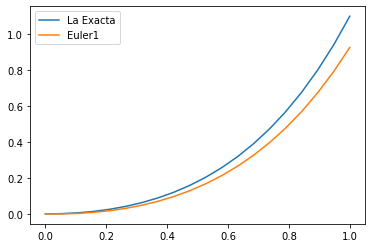

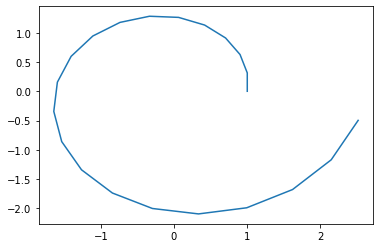

In [21]:
plt.plot(t,yext,label="La Exacta")
plt.plot(t,y1,label='Euler1')
plt.legend()
plt.show()
plt.plot(Re,Im)

# Euler 2

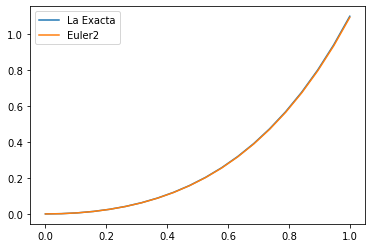

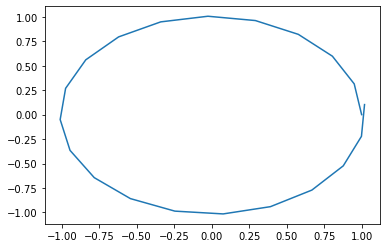

In [22]:
plt.plot(t,yext,label="La Exacta")
plt.plot(t,y2,label='Euler2')
plt.legend()
plt.show()
plt.plot(Re2,Im2)

# Euler 3

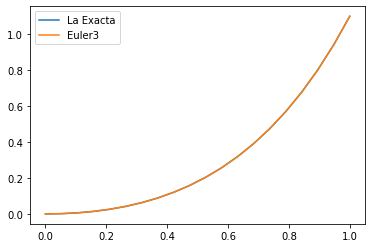

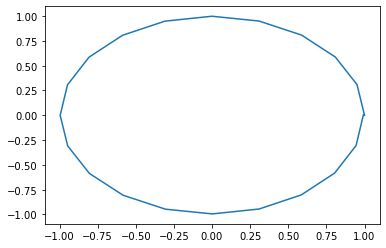

In [23]:
plt.plot(t,yext,label="La Exacta")
plt.plot(t,y3,label='Euler3')
plt.legend()
plt.show()
plt.plot(Re3,Im3)

# Euler 4

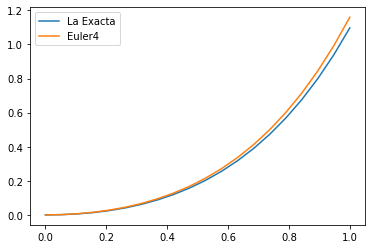

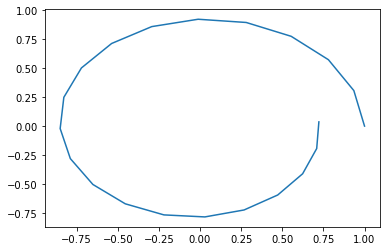

In [24]:
plt.plot(t,yext,label="La Exacta")
plt.plot(t,y4,label='Euler4')
plt.legend()
plt.show()
plt.plot(Re4,Im4)

Puede selecionar el numero de puntos N en la cuarta linea del codigo para ver que grado le conviene.